In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from os import listdir
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import tensorflow
np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -a '/content/drive/MyDrive/butterfly images/butterfly.zip' /content/butterfly

In [ ]:
%cd butterfly

/content/butterfly


In [ ]:
!ls

butterfly.zip


In [ ]:

zip_path = '/content/drive/MyDrive/butterfly images'
!unzip -q butterfly.zip
!rm butterfly.zip

In [ ]:
train_images = []       
train_labels = []
shape = (224,224) 

train_path = '/content/butterfly'
for filename in os.listdir(train_path):
    for f in os.listdir(train_path+'/'+filename)[:2000]:
      if f.split('.')[1]:
          x=train_path+'/'+filename
          print(os.path.join(x,f))
          img = cv2.imread(os.path.join(x,f))
          
          # Spliting file names and storing the labels for image in list
          train_labels.append(filename)
          
          # Resize all images to a specific shape
          img = cv2.resize(img,shape)
          
          train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

/content/butterfly/Non-skipper/2129-10.jpg
/content/butterfly/Non-skipper/2840-3.jpg
/content/butterfly/Non-skipper/1134-11.jpg
/content/butterfly/Non-skipper/690-9.jpg
/content/butterfly/Non-skipper/790-7.jpg
/content/butterfly/Non-skipper/650-11.jpg
/content/butterfly/Non-skipper/2935-5.jpg
/content/butterfly/Non-skipper/2119-3.jpg
/content/butterfly/Non-skipper/708-8.jpg
/content/butterfly/Non-skipper/853-7.jpg
/content/butterfly/Non-skipper/853-6.jpg
/content/butterfly/Non-skipper/3207-0.jpg
/content/butterfly/Non-skipper/525-1.jpg
/content/butterfly/Non-skipper/1125-1.jpg
/content/butterfly/Non-skipper/627-1.jpg
/content/butterfly/Non-skipper/514-4.jpg
/content/butterfly/Non-skipper/2959-5.jpg
/content/butterfly/Non-skipper/789-4.jpg
/content/butterfly/Non-skipper/2095-3.jpg
/content/butterfly/Non-skipper/960-11.jpg
/content/butterfly/Non-skipper/632-14.jpg
/content/butterfly/Non-skipper/872-14.jpg
/content/butterfly/Non-skipper/877-11.jpg
/content/butterfly/Non-skipper/899-1.jpg


In [ ]:
print(train_images.shape)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(4000, 224, 224, 3)
(3000, 224, 224, 3)
(1000, 224, 224, 3)
(3000, 2)
(1000, 2)


In [ ]:
x_train = np.array(x_train) /255
x_val = np.array(x_val) /255

In [ ]:
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
learningRate = 1e-3
EPcount = 20
batchSize = 16

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=learningRate),
    metrics=["accuracy"])
H = model.fit_generator(
    trainAug.flow(x_train, y_train, batch_size=batchSize),
    steps_per_epoch=len(x_train) // batchSize,
    validation_data=(x_val, y_val),
    validation_steps=len(x_val) // batchSize,
    epochs=EPcount)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
93/93 [==============================] - 84s 497ms/step - loss: 0.7050 - accuracy: 0.6098 - val_loss: 0.4474 - val_accuracy: 0.8400
Epoch 2/20
93/93 [==============================] - 32s 347ms/step - loss: 0.4554 - accuracy: 0.7875 - val_loss: 0.3729 - val_accuracy: 0.8390
Epoch 3/20
93/93 [==============================] - 32s 347ms/step - loss: 0.3846 - accuracy: 0.8334 - val_loss: 0.3428 - val_accuracy: 0.8580
Epoch 4/20
93/93 [==============================] - 32s 348ms/step - loss: 0.3571 - accuracy: 0.8407 - val_loss: 0.3191 - val_accuracy: 0.8640
Epoch 5/20
93/93 [==============================] - 32s 347ms/step - loss: 0.3522 - accuracy: 0.8454 - val_loss: 0.3029 - val_accuracy: 0.8710
Epoch 6/20
93/93 [==============================] - 32s 349ms/step - loss: 0.2970 - accuracy: 0.8764 - val_loss: 0.2999 - val_accuracy: 0.8750
Epoch 7/20
93/93 [==============================] - 33s 350ms/step - loss: 0.3225 - accuracy: 0.8615 - val_loss: 0.2892 - val_accuracy: 0.8750

In [ ]:
# list all data in history
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
H.history['accuracy']

[0.6883423328399658,
 0.8062668442726135,
 0.8301886916160583,
 0.8433288335800171,
 0.8568059206008911,
 0.868261456489563,
 0.8739892244338989,
 0.8733198642730713,
 0.8820754885673523,
 0.8824123740196228,
 0.8888140320777893,
 0.8915094137191772,
 0.8921833038330078,
 0.9002695679664612,
 0.8948786854743958,
 0.9033018946647644,
 0.895215630531311,
 0.8969002962112427,
 0.8965633511543274,
 0.9049865007400513]

In [ ]:
# learning rate 3e-4
# 10 epochs and 32 batch size
H.history['val_accuracy']

[0.8399999737739563,
 0.8389999866485596,
 0.8579999804496765,
 0.8640000224113464,
 0.8709999918937683,
 0.875,
 0.875,
 0.875,
 0.8790000081062317,
 0.8769999742507935,
 0.8849999904632568,
 0.8809999823570251,
 0.8849999904632568,
 0.8980000019073486,
 0.9010000228881836,
 0.8880000114440918,
 0.8740000128746033,
 0.902999997138977,
 0.9039999842643738,
 0.9049999713897705]

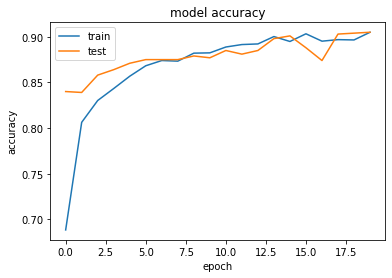

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

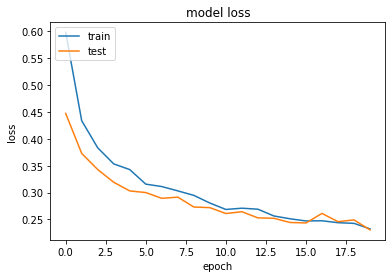

In [ ]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predIdxs = model.predict(x_val)

In [ ]:
x_val.shape

(1000, 224, 224, 3)

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)
predIdxs

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,

import keras
keras.__version__

In [ ]:
from keras.models import load_model
model.save('new_butterfly.h5')

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_val.argmax(axis=1), predIdxs)*100,"%")

Accuracy:  90.5 %


In [ ]:
from sklearn.metrics import log_loss
print("Log loss: ",log_loss(y_val.argmax(axis=1), predIdxs))

Log loss:  3.2812285349726062


Score: ROC AUC=0.906


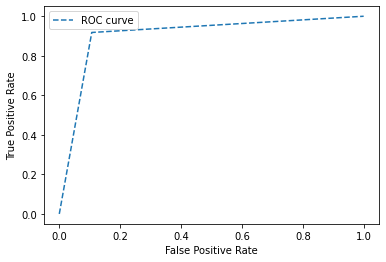

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_auc = roc_auc_score(y_val.argmax(axis=1), predIdxs)
# summarize scores
print('Score: ROC AUC=%.3f' % (ns_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_val.argmax(axis=1), predIdxs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='ROC curve')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:

from sklearn.metrics import confusion_matrix
rounded_labels= y_val.argmax(axis=1)
print("Confusion matrix: ")
cmtx = pd.DataFrame(
    confusion_matrix(rounded_labels, predIdxs), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no']
)
print(cmtx)

Confusion matrix: 
          pred:yes  pred:no
true:yes       469       56
true:no         39      436


In [ ]:
print(classification_report(y_val.argmax(axis=1), predIdxs))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       525
           1       0.89      0.92      0.90       475

    accuracy                           0.91      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.91      0.91      1000

